# Client Behavior Analysis

In [1]:
import pandas as pd

df = pd.read_csv("../data/demo_behavior_dataset.csv")
demo_behavior_df = df.copy()

In [2]:
demo_behavior_df.head(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,n_attempts,n_events,n_errors_per_attempt,converted,total_duration_sec
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,1,11,0,True,348758.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,1,6,0,True,295.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,2,5,0,False,117.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,1,1,0,False,0.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,1,1,0,False,0.0


### Starting the analysis with a heatmap 

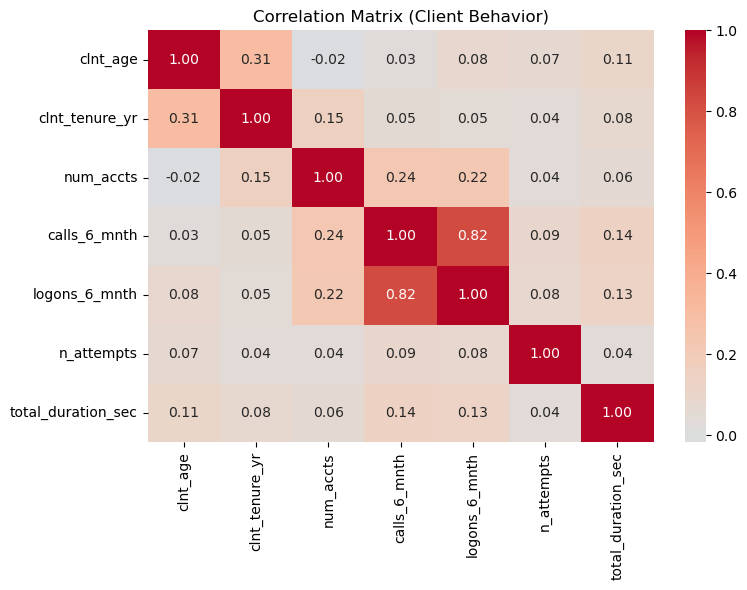

In [56]:
# to identify potential relationships, before going deeper
# chossing only numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "clnt_age",
    "clnt_tenure_yr",
    "num_accts",
    "calls_6_mnth",
    "logons_6_mnth",
    "n_attempts",
    "total_duration_sec",
]

corr_df = demo_behavior_df[num_cols].dropna()

corr = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix (Client Behavior)")
plt.tight_layout()
plt.show()


### What is the distribution of tenure, age, logs, and calls in those customers?

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
VANGUARD_PALETTE = {
    "red":      "#96151D",  # anchor
    "charcoal": "#222222",
    "slate":    "#4B5563",
    "steel":    "#64748B",
    "blue":     "#1F4E79",
    "teal":     "#0F766E",
    "gold":     "#B08900",
    "light":    "#E5E7EB",
}

# handy ordered list for seaborn/matplotlib
VANGUARD_COLORS = [
    VANGUARD_PALETTE["red"],
    VANGUARD_PALETTE["blue"],
    VANGUARD_PALETTE["teal"],
    VANGUARD_PALETTE["gold"],
    VANGUARD_PALETTE["slate"],
    VANGUARD_PALETTE["steel"],
    VANGUARD_PALETTE["charcoal"],
    VANGUARD_PALETTE["light"],
]


In [7]:
import seaborn as sns
sns.set_palette(VANGUARD_COLORS)


### Age distribution

In [8]:
# Age distribution
print("Age Statistics:")
print(demo_behavior_df['clnt_age'].describe())
print(f"\nMost common age: {demo_behavior_df['clnt_age'].mode()[0]}")

Age Statistics:
count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

Most common age: 58.5


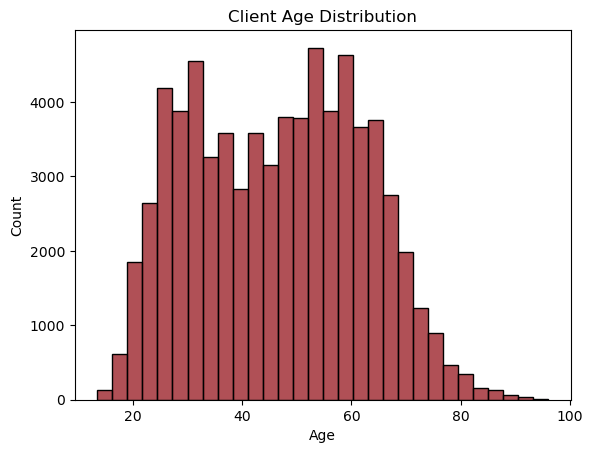

In [10]:
sns.histplot(demo_behavior_df["clnt_age"], bins=30)
plt.title("Client Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [15]:
#Younger vs older

# Define age groups
demo_behavior_df['age_group'] = pd.cut(demo_behavior_df['clnt_age'], 
                                      bins=[0, 20, 36, 52, 72, 100], 
                                      labels=['Gen-Z', 'Millenials', 'Gen-X', 'Boomers', 'Silent Generation'])

print(demo_behavior_df['age_group'].value_counts())

age_group
Boomers              25234
Millenials           20884
Gen-X                20236
Silent Generation     2761
Gen-Z                 1479
Name: count, dtype: int64


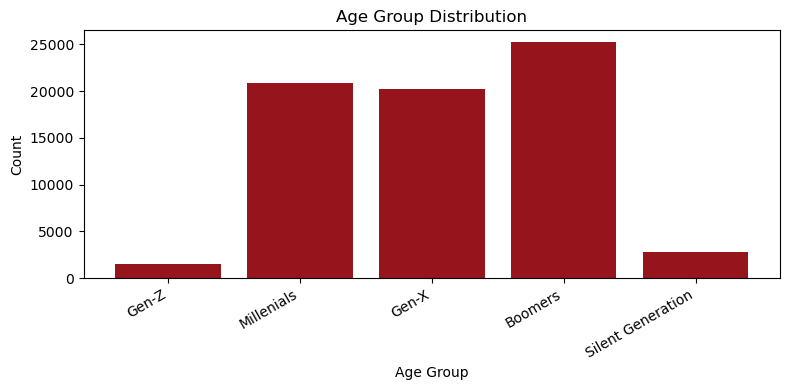

In [16]:
# we want to create a barplot for our age clusters
import matplotlib.pyplot as plt

age_counts = demo_behavior_df["age_group"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(age_counts.index.astype(str), age_counts.values, color=VANGUARD_PALETTE["red"])
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


### Gender distribution

In [11]:
# Gender distribution
print("\nGender Distribution:")
print(demo_behavior_df['gendr'].value_counts())
print(f"\nPercentages:")
print(demo_behavior_df['gendr'].value_counts(normalize=True) * 100)


Gender Distribution:
gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

Percentages:
gendr
U    34.170043
M    33.606255
F    32.219452
X     0.004250
Name: proportion, dtype: float64


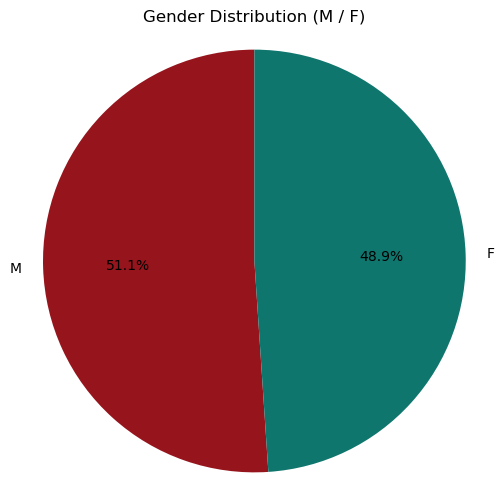

In [14]:
import matplotlib.pyplot as plt

gender_counts = (
    demo_behavior_df[demo_behavior_df["gendr"].isin(["M", "F"])]
    ["gendr"]
    .value_counts()
)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    colors=[VANGUARD_PALETTE["red"], VANGUARD_PALETTE["teal"]],
    startangle=90
)
plt.title("Gender Distribution (M / F)")
plt.axis("equal")
plt.show()

### Tenure distribution

In [17]:
#Tenure : (years)
print("Tenure (years) statistics:")
print(demo_behavior_df['clnt_tenure_yr'].describe())

# Categorize by tenure
demo_behavior_df['tenure_group'] = pd.cut(demo_behavior_df['clnt_tenure_yr'], 
                                         bins=[0, 5, 10, 25], 
                                         labels=['New (0-5 yrs)', 'Medium (6-10 yrs)', 'Long-standing (>10 yrs)'])

print("\nTenure Groups:")
print(demo_behavior_df['tenure_group'].value_counts())

Tenure (years) statistics:
count    70594.000000
mean        12.053007
std          6.871850
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64

Tenure Groups:
tenure_group
Long-standing (>10 yrs)    32752
Medium (6-10 yrs)          22223
New (0-5 yrs)              12172
Name: count, dtype: int64


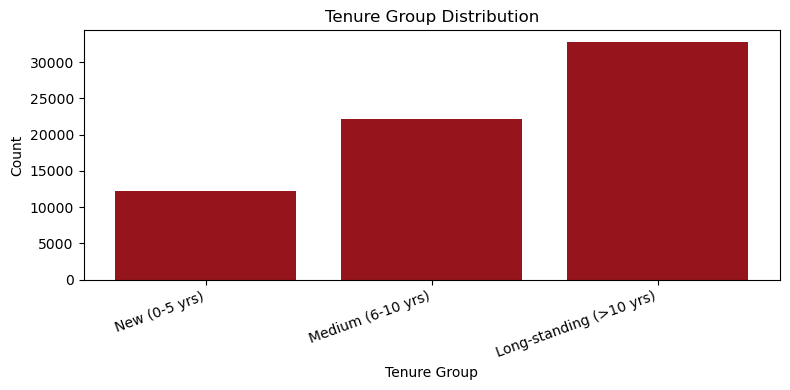

In [18]:
# now we want to show the distribution based on tenure, using the clusters that we created
import matplotlib.pyplot as plt

tenure_counts = demo_behavior_df["tenure_group"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(tenure_counts.index.astype(str), tenure_counts.values, color=VANGUARD_PALETTE["red"])
plt.title("Tenure Group Distribution")
plt.xlabel("Tenure Group")
plt.ylabel("Count")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


### Logs and Calls

In [19]:
# Logon behavior
print("Logons in last 6 months:")
print(demo_behavior_df['logons_6_mnth'].describe())

# Phone calls behavior
print("\nPhone calls in last 6 months:")
print(demo_behavior_df['calls_6_mnth'].describe())

# Compare: who uses online the most?
demo_behavior_df['prefers_online'] = demo_behavior_df['logons_6_mnth'] > demo_behavior_df['calls_6_mnth']
print(f"\nClients who prefer online: {demo_behavior_df['prefers_online'].sum()}")
print(f"Clients who prefer phone: {(~demo_behavior_df['prefers_online']).sum()}")

Logons in last 6 months:
count    70594.000000
mean         5.566720
std          2.353296
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

Phone calls in last 6 months:
count    70594.000000
mean         3.382469
std          2.236595
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          7.000000
Name: calls_6_mnth, dtype: float64

Clients who prefer online: 51175
Clients who prefer phone: 19419


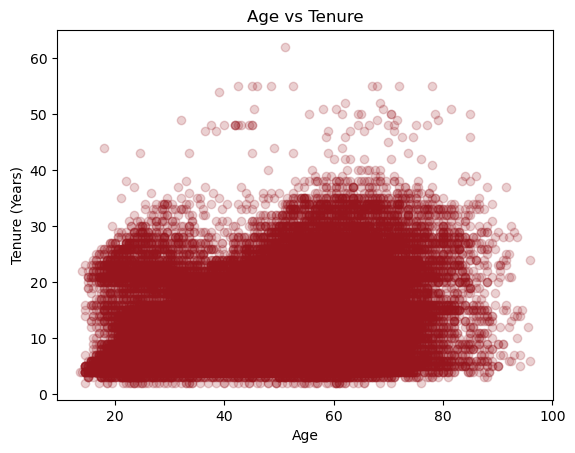

In [20]:
# age vs. tenure
plt.scatter(
    demo_behavior_df["clnt_age"],
    demo_behavior_df["clnt_tenure_yr"],
    alpha=0.2,
    color=VANGUARD_PALETTE["red"]
)
plt.xlabel("Age")
plt.ylabel("Tenure (Years)")
plt.title("Age vs Tenure")
plt.show()


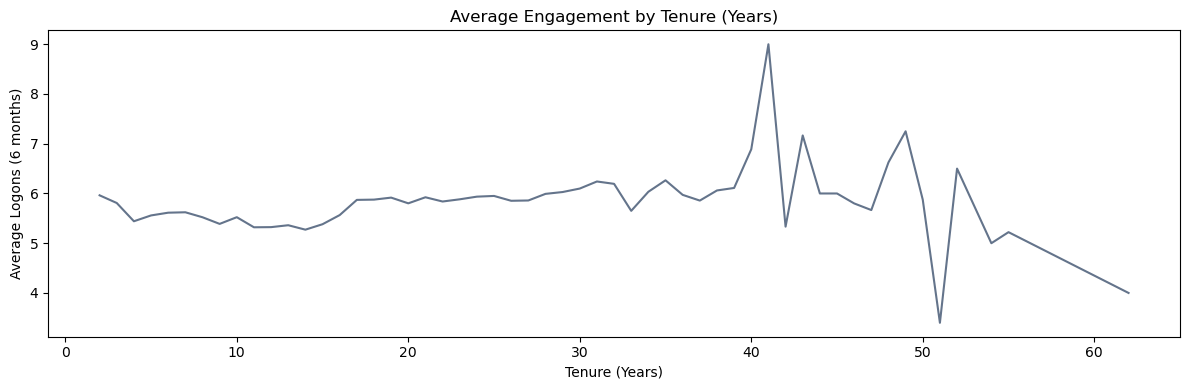

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tenure_engagement = (
    demo_behavior_df
    .groupby("clnt_tenure_yr")["logons_6_mnth"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 4))
plt.plot(tenure_engagement.index, tenure_engagement.values, color=VANGUARD_PALETTE["steel"])
plt.title("Average Engagement by Tenure (Years)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Logons (6 months)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.show()

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/852910742.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age_group")["logons_6_mnth"]


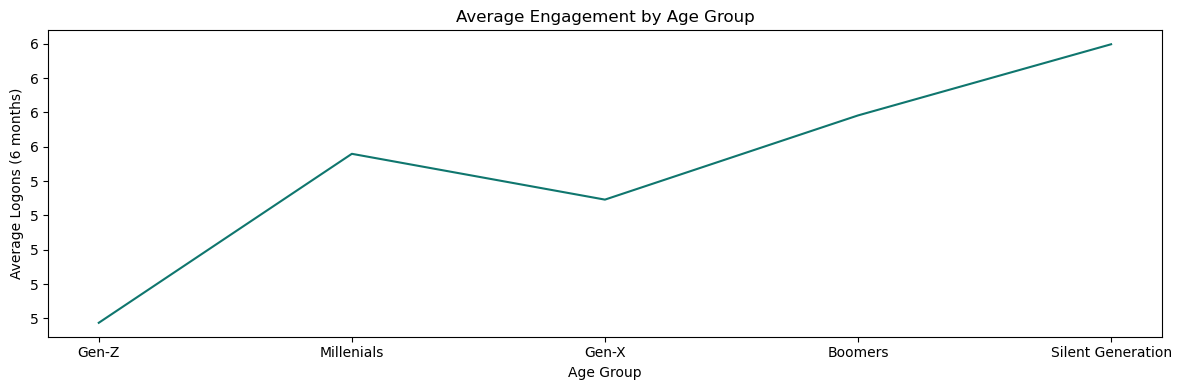

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tenure_engagement = (
    demo_behavior_df
    .groupby("age_group")["logons_6_mnth"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 4))
plt.plot(tenure_engagement.index, tenure_engagement.values, color=VANGUARD_PALETTE["teal"])
plt.title("Average Engagement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Logons (6 months)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.show()

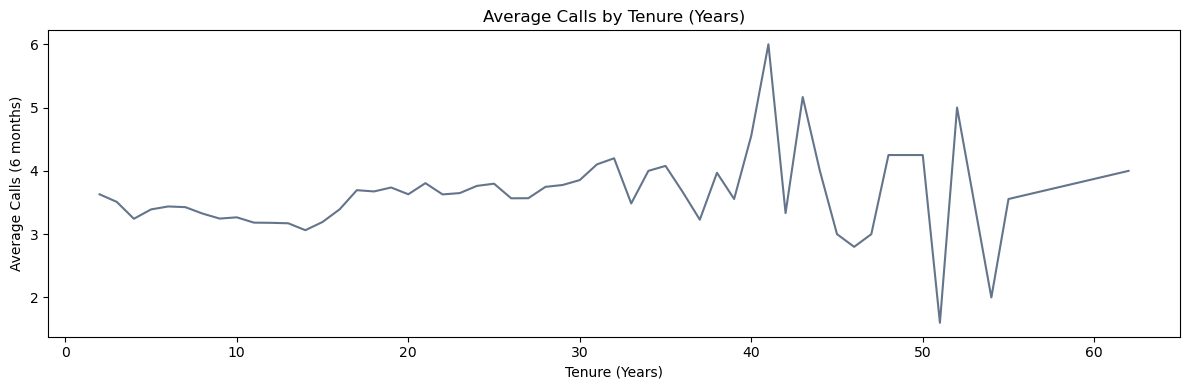

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tenure_engagement = (
    demo_behavior_df
    .groupby("clnt_tenure_yr")["calls_6_mnth"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 4))
plt.plot(tenure_engagement.index, tenure_engagement.values, color=VANGUARD_PALETTE["steel"])
plt.title("Average Calls by Tenure (Years)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Calls (6 months)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.show()

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/1442552147.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age_group")["calls_6_mnth"]


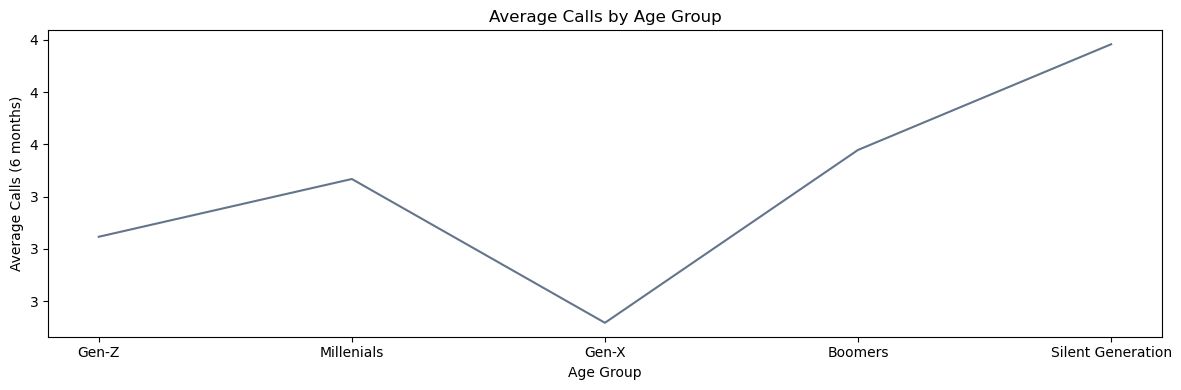

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tenure_engagement = (
    demo_behavior_df
    .groupby("age_group")["calls_6_mnth"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 4))
plt.plot(tenure_engagement.index, tenure_engagement.values, color=VANGUARD_PALETTE["steel"])
plt.title("Average Calls by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Calls (6 months)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.show()

### Attempts by tenure and age

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/1173888307.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_behavior_df.groupby("tenure_group")["n_attempts"]


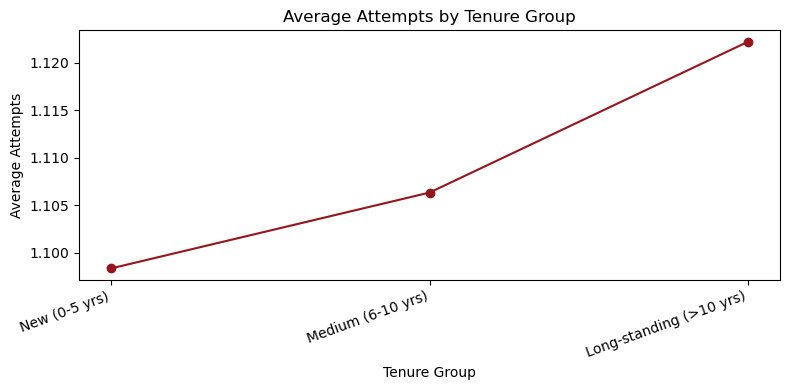

In [44]:
# Attempts by tenure group
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

attempts_by_tenure = (
    demo_behavior_df.groupby("tenure_group")["n_attempts"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8, 4))
plt.plot(
    attempts_by_tenure.index.astype(str),
    attempts_by_tenure.values,
    marker="o",
    color=VANGUARD_PALETTE["red"]
)
plt.title("Average Attempts by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Average Attempts")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()




In [40]:
demo_behavior_df.groupby("age_group")["n_attempts"].mean()

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/2727917464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_behavior_df.groupby("age_group")["n_attempts"].mean()


age_group
Gen-Z                1.083164
Millenials           1.081641
Gen-X                1.105060
Boomers              1.144329
Silent Generation    1.186164
Name: n_attempts, dtype: float64

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/1517027629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_behavior_df.groupby("age_group")["n_attempts"]


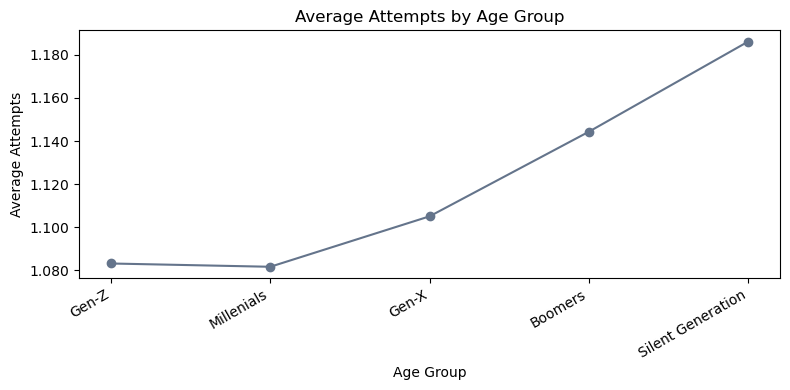

In [43]:
# Attempts by age group
attempts_by_age = (
    demo_behavior_df.groupby("age_group")["n_attempts"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8, 4))
plt.plot(
    attempts_by_age.index.astype(str),
    attempts_by_age.values,
    marker="o",
    color=VANGUARD_PALETTE["steel"]
)
plt.title("Average Attempts by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Attempts")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Total Time Spent distribution per tenure, age, and number of accounts.

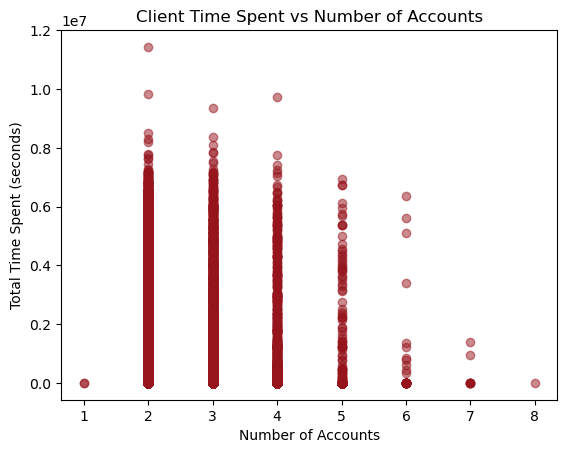

In [45]:
plt.figure()
plt.scatter(
    demo_behavior_df["num_accts"],
    demo_behavior_df["total_duration_sec"],
    alpha=0.5
)
plt.xlabel("Number of Accounts")
plt.ylabel("Total Time Spent (seconds)")
plt.title("Client Time Spent vs Number of Accounts")
plt.show()

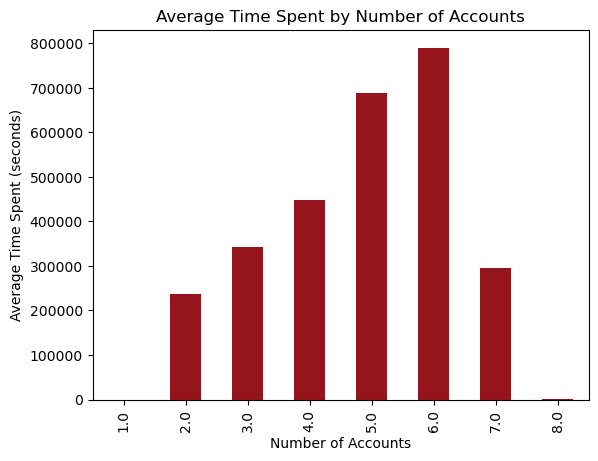

In [46]:
# Average time per number of accounts: 
avg_time = (
    demo_behavior_df
    .groupby("num_accts")["total_duration_sec"]
    .mean()
)

plt.figure()
avg_time.plot(kind="bar")
plt.xlabel("Number of Accounts")
plt.ylabel("Average Time Spent (seconds)")
plt.title("Average Time Spent by Number of Accounts")
plt.show()

/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/3207235339.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_behavior_df.groupby("tenure_group")["total_duration_sec"]


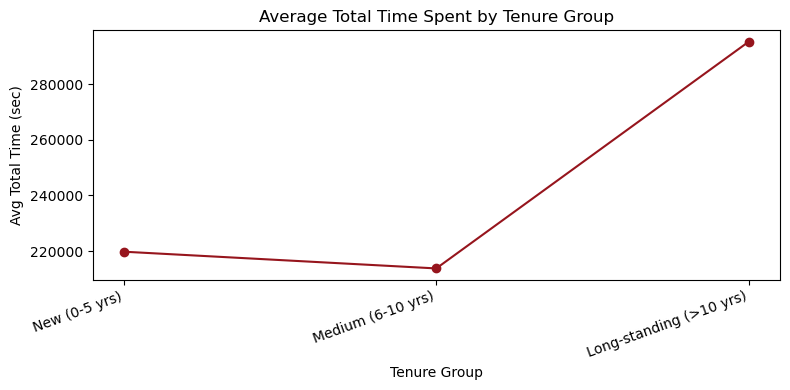

In [48]:
# average time spent per tenure group
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

time_by_tenure = (
    demo_behavior_df.groupby("tenure_group")["total_duration_sec"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8,4))
plt.plot(time_by_tenure.index.astype(str), time_by_tenure.values, marker="o", color=VANGUARD_PALETTE["red"])
plt.title("Average Total Time Spent by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Avg Total Time (sec)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/441256197.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_behavior_df.groupby("age_group")["total_duration_sec"]


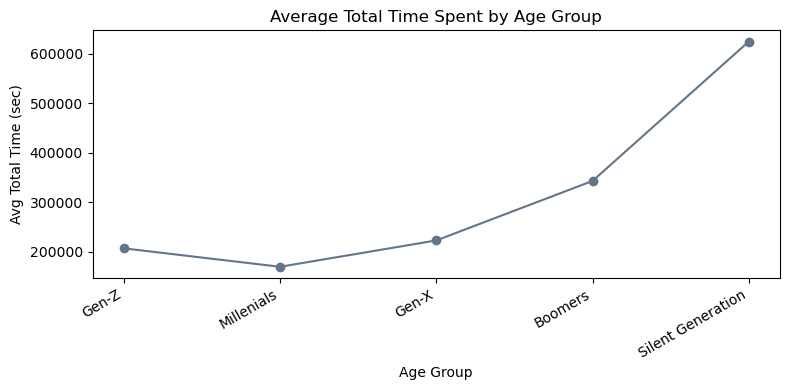

In [49]:
# average time by age_group
time_by_age = (
    demo_behavior_df.groupby("age_group")["total_duration_sec"]
    .mean()
    .sort_index()
)

plt.figure(figsize=(8,4))
plt.plot(time_by_age.index.astype(str), time_by_age.values, marker="o", color=VANGUARD_PALETTE["steel"])
plt.title("Average Total Time Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Total Time (sec)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

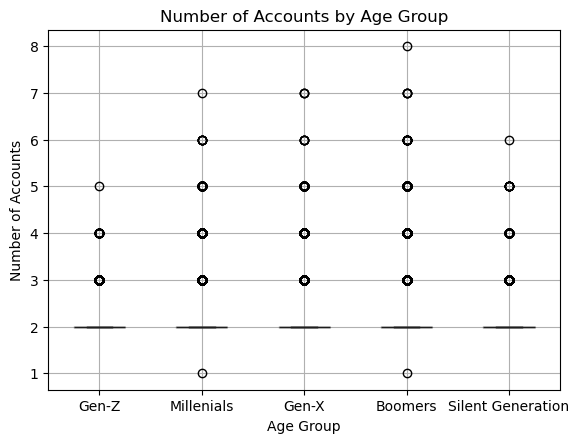

In [50]:
# asking about confounding:
# Is time increasing because people are older, or because older people tend to have more accounts?

plt.figure()
demo_behavior_df.boxplot(
    column="num_accts",
    by="age_group"
)
plt.title("Number of Accounts by Age Group")
plt.suptitle("")
plt.xlabel("Age Group")
plt.ylabel("Number of Accounts")
plt.show()

In [51]:
acct_by_age = (
    demo_behavior_df
    .groupby("age_group")["num_accts"]
    .mean()
    .sort_index()
)

acct_by_age


/var/folders/13/s00136yd6q5bvv6x74_x_m204g4004/T/ipykernel_39342/23052698.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age_group")["num_accts"]


age_group
Gen-Z                2.225152
Millenials           2.268818
Gen-X                2.258104
Boomers              2.246097
Silent Generation    2.238682
Name: num_accts, dtype: float64